# Stroke Prediction Modeling

In [ ]:
!pip install catboost
!pip list --format=freeze > requirements.txt

### 1. Loading Dependencies and Data

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd

In [4]:
# csv 파일 로드
train=pd.read_csv("kaggle-dataset/healthcare-dataset-stroke-data.csv")
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 2. Data Visualization and Feature Selection

In [5]:
# 필요한 라이브러리 임포트
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

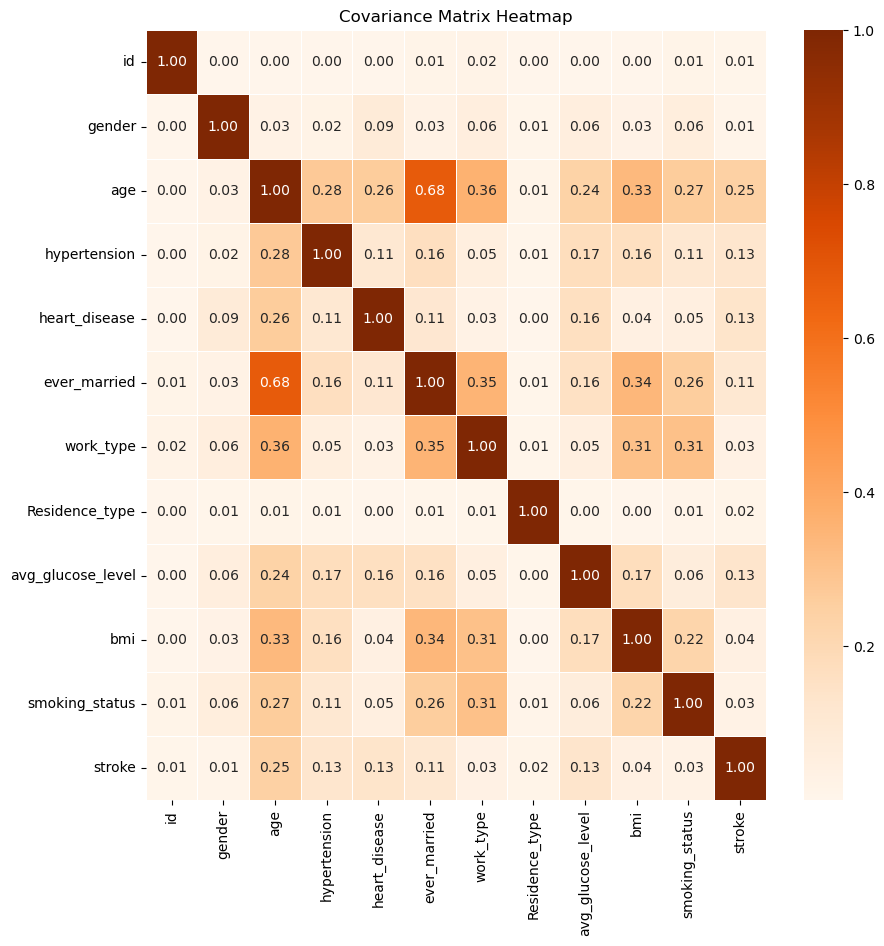

In [6]:
# LabelEncoder와 StandardScaler를 인스턴스화
label_encoder = LabelEncoder()  # 범주형 데이터를 수치형으로 변환
scaler = StandardScaler()       # 데이터 표준화

# dataframe의 각 열에 대해 문자열 데이터가 있는 경우 LabelEncoder로 변환
df = train.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

# 변환된 데이터를 StandardScaler를 사용해 표준화
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 표준화된 dataframe의 공분산 행렬을 계산하고 절대값으로 저장
cov_matrix = abs(trainup.cov())

# 히트맵의 크기를 설정
plt.figure(figsize=(10, 10))

# 공분산 행렬을 히트맵으로 시각화
sns.heatmap(cov_matrix, annot=True, cmap='Oranges', fmt='.2f', linewidths=.5)

# 히트맵의 제목
plt.title('Covariance Matrix Heatmap')

# 히트맵 출력
plt.show()


### 3. Model Fitting and Evaluation

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [8]:
# 데이터 로드 및 전처리
df = train.copy()  # train 데이터를 복사하여 사용

# 'id'와 'gender' 열 삭제
df = df.drop(['id', 'gender'], axis=1)

# LabelEncoder와 StandardScaler를 인스턴스화
label_encoder = LabelEncoder()  # 범주형 데이터를 수치형으로 변환
scaler = StandardScaler()       # 데이터 표준화

# dataframe의 각 열에 대해 문자열 데이터가 있는 경우 LabelEncoder로 변환
df = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

# 독립 변수(X)와 종속 변수(Y) 분리
X_train = df.drop(['stroke'], axis=1)
Y_train = df['stroke']

# 독립 변수 데이터 표준화
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [9]:
# CatBoostClassifier 모델 설정
model = CatBoostClassifier(
    iterations=100,
    depth=5,
    learning_rate=0.2,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    metric_period=100
)

# cross validation을 위한 KFold 설정
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# cross validation을 수행해 각 fold의 accuracy 계산
cv_results = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')

# accuracy 저장
accuracy = cv_results

# 모든 fold의 평균 정확도 계산
average_accuracy = cv_results.mean()

# 각 폴드의 정확도 출력
print("Accuracy for each fold:", accuracy)

# 모든 폴드의 평균 정확도 출력
print("Average Accuracy across all folds:", average_accuracy)

# 최종 모델을 전체 데이터로 학습
model.fit(X_train, Y_train)

0:	learn: 0.9558977	total: 141ms	remaining: 14s
99:	learn: 0.9605950	total: 285ms	remaining: 0us
0:	learn: 0.9478079	total: 1.74ms	remaining: 172ms
99:	learn: 0.9538100	total: 156ms	remaining: 0us
0:	learn: 0.9493869	total: 1.53ms	remaining: 151ms
99:	learn: 0.9572137	total: 141ms	remaining: 0us
0:	learn: 0.9519958	total: 3.23ms	remaining: 320ms
99:	learn: 0.9606053	total: 150ms	remaining: 0us
Accuracy for each fold: [0.94053208 0.96322379 0.95536413 0.94909945]
Average Accuracy across all folds: 0.9520548637688832
0:	learn: 0.9512720	total: 1.77ms	remaining: 175ms
99:	learn: 0.9571429	total: 152ms	remaining: 0us


### 4. 모델 저장

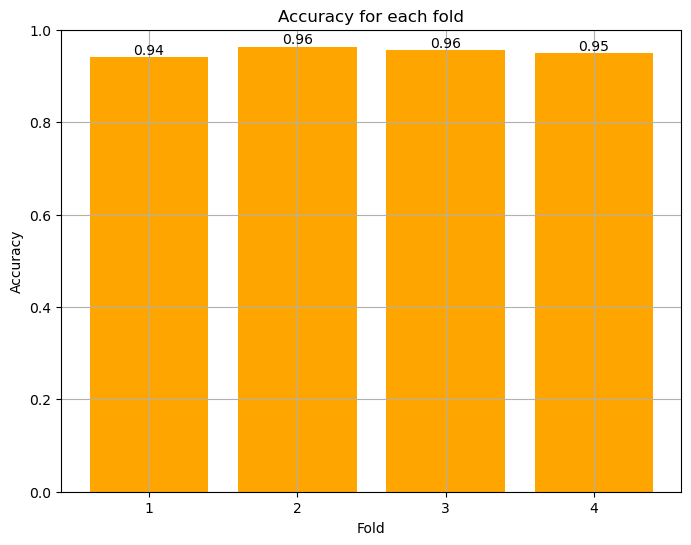

Average Accuracy across all folds: 0.9520548637688832


In [10]:
# 모델 저장
model.save_model("catboost_model.cbm")

# 정확도를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(accuracy) + 1), accuracy, color='orange')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold')
plt.ylim(0, 1)  # 정확도 범위를 0에서 1로 설정
plt.xticks(range(1, len(accuracy) + 1))  # x축 눈금을 폴드 번호로 설정
plt.grid(True)

# 각 막대 위에 정확도 값 표시
for i in range(len(accuracy)):
    plt.text(i + 1, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom')

plt.show()

# 평균 정확도 출력
print("Average Accuracy across all folds:", average_accuracy)

### 5. Model Test

In [11]:
# 모델 불러오기
model = CatBoostClassifier()
model.load_model("catboost_model.cbm")

# test 데이터에서 'id'와 'gender' 열 삭제
test_data = train.drop(['id', 'gender'], axis=1)
# test_data = test_data.iloc[35:36,:]
print(test_data)

# LabelEncoder와 StandardScaler를 사용하여 test 데이터를 변환
test_data = test_data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
test_data_scaled = scaler.transform(test_data.drop(['stroke'], axis=1))

# test 데이터의 실제 값 (target 변수)
test_labels = test_data['stroke']

# 예측 수행
predictions = model.predict(test_data_scaled)
test_accuracy = accuracy_score(test_labels, predictions)

# 테스트 데이터에 대한 정확도 출력
print("Test Accuracy:", test_accuracy)
# 예측 결과 출력
print("Predictions:", predictions)
print("Actual labels:", test_labels.values)

       age  hypertension  heart_disease ever_married      work_type  \
0     67.0             0              1          Yes        Private   
1     61.0             0              0          Yes  Self-employed   
2     80.0             0              1          Yes        Private   
3     49.0             0              0          Yes        Private   
4     79.0             1              0          Yes  Self-employed   
...    ...           ...            ...          ...            ...   
5105  80.0             1              0          Yes        Private   
5106  81.0             0              0          Yes  Self-employed   
5107  35.0             0              0          Yes  Self-employed   
5108  51.0             0              0          Yes        Private   
5109  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1  

In [12]:
# 테스트 결과 저장
import csv

# CSV 파일에 저장할 데이터
data = {'Actual Labels': test_labels.values, 'Predicted Labels': predictions}

# CSV 파일로 데이터 저장
with open('predictions.csv', 'w', newline='') as csvfile:
    fieldnames = ['Actual Labels', 'Predicted Labels']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # 헤더 작성
    writer.writeheader()
    
    # 각 행에 데이터 작성
    for i in range(len(test_labels)):
        writer.writerow({'Actual Labels': test_labels.values[i], 'Predicted Labels': predictions[i]})

### 6. Test by new input Data

In [15]:
# 새로운 데이터 예측
# new_data = [82.0, 1, 1, 'No', "Private", "Rural", 84.03, 26.5, "formerly smoked"]   # 1
new_data = [50,	1,	0,	"Yes",	'Self-employed',	'Rural',	167.41,	30.9,	'never smoked'] # 1

# 새로운 데이터를 데이터프레임으로 변환하고 LabelEncoder 및 StandardScaler로 변환
new_data_df = pd.DataFrame([new_data], columns=['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])
new_data_df = new_data_df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
new_data_scaled = scaler.transform(new_data_df)

# 예측 수행
prediction = model.predict(new_data_scaled)
prediction_probability = model.predict_proba(new_data_scaled)  # 새로운 데이터에 대한 확률 예측

print("Prediction:", prediction)
print("Prediction probability:", prediction_probability)

Prediction: [0]
Prediction probability: [[0.9089574 0.0910426]]
